# MNIST Problem
written by Emmanuel Misley (https://github.com/Misley-tech)
## Problem description
The MNIST is a classic multiclassification problem and is often called the "Hello World" of Machine Learning. Its initials refer to the *National Institute of Standards and Technology Database* because this organization collected 60000 handwritten digits from 0 to 9 for the training set, each with an image resolution of 28 x 28 pixels. The 10000 symbols from the test set were written by high school students and employees of the US Census Bureau.

A fundamental property of this data set is that it is labeled, this allow us to use methods like Stochastic Gradient Descent, Support Vector Machines, and others. If the data were not label, using Neural Networks would still be an effective aproach, but it is more complex and time-consuming.    

**Data set summary:**
<ol>
  <li>Train set: 60000 digits</li>
  <li>Test set: 10000 digits</li>
  <li>images resolution: 28 x 28 pixels </li>
</ol>

## Importing the data set
First of all, let's import the MNIST data set, luckily it's preloaded in the Keras library

In [5]:
from keras.datasets import mnist

(img_train, labels_train), (img_test, labels_test) = mnist.load_data()

To make sure everything is OK, I'll plot some digits from the MNIST data set

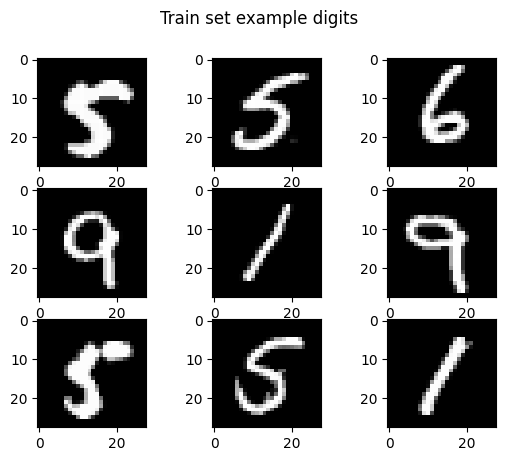

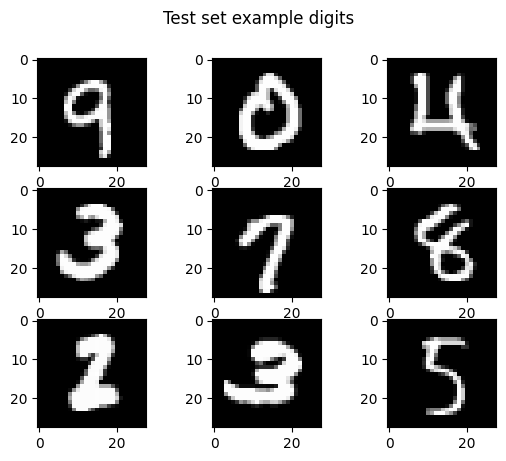

In [6]:
import matplotlib.pyplot as plt
import numpy as np

last_pic_train = np.shape(img_train)[0]
last_pic_test = np.shape(img_test)[0]

A=[]
[A.append(np.random.randint(0,last_pic_train)) for x in range(9)]

B=[]
[B.append(np.random.randint(0,last_pic_test)) for x in range(9)]

fig, axs = plt.subplots(3,3)
fig.suptitle('Train set example digits')
axs[0,0].imshow(img_train[A[0]],cmap='gray')
axs[0,1].imshow(img_train[A[1]],cmap='gray')
axs[0,2].imshow(img_train[A[2]],cmap='gray')

axs[1,0].imshow(img_train[A[3]],cmap='gray')
axs[1,1].imshow(img_train[A[4]],cmap='gray')
axs[1,2].imshow(img_train[A[5]],cmap='gray')

axs[2,0].imshow(img_train[A[6]],cmap='gray')
axs[2,1].imshow(img_train[A[7]],cmap='gray')
axs[2,2].imshow(img_train[A[8]],cmap='gray')

fig, axs = plt.subplots(3,3)
fig.suptitle('Test set example digits')
axs[0,0].imshow(img_test[B[0]],cmap='gray')
axs[0,1].imshow(img_test[B[1]],cmap='gray')
axs[0,2].imshow(img_test[B[2]],cmap='gray')

axs[1,0].imshow(img_test[B[3]],cmap='gray')
axs[1,1].imshow(img_test[B[4]],cmap='gray')
axs[1,2].imshow(img_test[B[5]],cmap='gray')

axs[2,0].imshow(img_test[B[6]],cmap='gray')
axs[2,1].imshow(img_test[B[7]],cmap='gray')
axs[2,2].imshow(img_test[B[8]],cmap='gray')

plt.show()

## MNIST with Stochastic Gradient Descent

### Introduction

Let's anticipate some things: firstly, this method has a strong disadvantage - it is very slow. Although the data set is not particularly huge and the resolution of each image is considerably low, the training process will take between 3 and 4 minutes, therefore it's important to have this in mind for larger data sets. Secondly, gradient descent is one of the most basic methods to train a machine learning model, it is an optimization method that consist of updating its weights and biases **until they converge to a minimum, which guarantees that those are the optimal values (doble check, I think this is wrong)**.

### Casting the training data
Let's dive right into the problem. The main issue to consider is the dimension of the lists: img_train and img_test, let's see why. 

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(img_train, labels_train)

ValueError: Found array with dim 3. SGDClassifier expected <= 2.

so this error "**Found array with dim 3. SGDClassifier expected <= 2.**" means that there's an issue with the dimensions of the arrays, let's take look 

In [8]:
print(img_train.shape)
print(img_test.shape)

(60000, 28, 28)
(10000, 28, 28)


so that's the problem! we need to transform those two variables into 2D array. Let's obtain some detailed information about these images 

In [9]:
print(len(img_train))
print(len(img_train[0]))
print(img_train[0][0])
print(img_train[0])

60000
28
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   

As you can see from the output of the third and fourth lines of code, each array within the outer array contains one horizontal strip of pixels from the image. The aim is to merge all this information into a mumpy array that is stored in an element of the outer array. In short, we need to get rid of all the square brackets that are not from the outer array. By doing that, all the numeric values will be stored inside the big array.

This is why is necesary to flatten all these arrays. The solution that I found was the following

In [10]:
def flatten(l):
    """
    Function that flatten an array or list
        Parameters:
            l (array): array that represents the grayscale intensity values of one line of the image. 
        Returns:
            a (ndarray): 
    """
    a = np.array([item for sublist in l for item in sublist])
    return a   

img_train_ = []
for i in range(len(img_train)):
    img_train_.append(flatten(img_train[i]))

In [11]:
print(f'The number of images stored are {len(img_train_)}')
print(img_train_[0])

The number of images stored are 60000
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 

We did it! We got rid of the undesired square brackets, and now it's ready to be injected into the **SGDClassifier**.

***Remark:*** this process is highly inefficient due to function **flatten**. This function has a time-complexity of $\mathcal{O}(n^2)$ because it excutes two nested loops with an append operation, which is $\mathcal{O}(1)$, inside it. Here is a non-comprehensive version of **flatten** function

In [ ]:
def NC_flatten(l):
    """
    non-comprehensive function that flatten an array or list
        Parameters:
            l (array): array that represents the grayscale intensity values of one line of the image. 
        Returns:
            a (ndarray): 
    """
    a = []
    # general time-complexity is O(n*m)
    for sublist in l:        # time-complexity of O(m)
        for item in sublist: # time-complexity of O(n)
            a.append(item)   # time-complexity of O(1) 
    return a 

In addition there's a loop to cast the img_train variable to obtain a 2D array. This is the reason why it may take from 5 to 10 seconds.


### Training process
Finally, we're ready to train our ML model! Let's input img_train_ with the corresponding labels. As I mentioned before, this method is slow, so the training process will take between 3 and 5 minutes. So don't despair.  

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(img_train_, labels_train)

SGDClassifier(random_state=42)

### Making predictions and measuring accuracy
Now let's make some predictions and measure its accuracy. But first we have to cast the img_test variable, just as we did with the img_train.

In [13]:
img_test_ = []
for i in range(len(img_test)):
    img_test_.append(flatten(img_test[i]))

now will make some predictions and measuring the accuracy of the model

In [21]:
from sklearn.metrics import accuracy_score

sgd_svm_pred = sgd_clf.predict(img_test_)
sgd_accuracy = accuracy_score(labels_test, sgd_svm_pred)

Now you can evaluate the performance with some particualar cases

The predicted symbol is 1


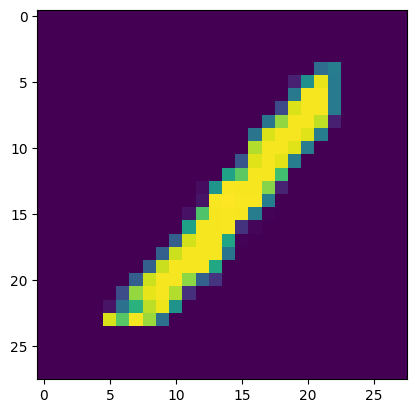

In [43]:
import matplotlib.pyplot as plt
i = np.random.randint(0,len(img_test_))
plt.imshow(img_test_[i].reshape(28,28))

print(f'The predicted symbol is {sgd_svm_pred[i]}')

### Conclusions

This is not the best classification algorithm in the world, but it presents a fairly good performance. This approach is not difficult and is simple compared to other methods like Support Vector Machines and Neural Networks.

## MNIST with Artificial Neural Networks


For this approach, we will create and train a neural network to solve the MNIST problem. As we modified some variables in the previous method, let's import them again to avoid further issues.

In [11]:
from keras.datasets import mnist

(img_train, labels_train), (img_test, labels_test) = mnist.load_data()

Let's determine the neural network's ariquitecture

In [12]:
from keras import models 
from keras import layers

network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

- The first line: calls the class Sequential, it creates the Neural Network which at this point is empty.

- The second line: This method adds 1 hidden layer which is densely connected. This means that all the nodes from the hidden layer i are connected to all the nodes of hidden layer i+1. The amount of nodes added in this second layer (or first hidden layer) are 512. The activation function is the ReLU. The input layer consist of 784 nodes.

- The third line: This method does the same thing as the previous line, but the nodes of the layer is 10 and the activation function is the softmax.  

To sum up:
<ol>
  <li>input layer: 784 nodes </li>
  <li>hidden layer: 512 nodes (ReLU) </li>
  <li>output layer: 10 nodes (softmax) </li>
</ol>

### Optimizer, Loss function & metrics
First of all let's define this three parameters:
<ol>
  <li> Optimizer: Is the method used to train the NN. It's the method used to minimize the loss function. The available optimizer are: SCG, Adam, RMSprop, Adagrad, Adadelta </li>
  <li> Loss/cost function: this function measures how well the neural network performs on a particular task. The available metrics are: Mean Squared Error, Mean Absolute Error, Binary Cross-Entropy, Categorical Cross-Entropy, Sparse Categorical Cross-Entropy </li>
  <li> Metrics: this are the methods used to monitor the performance of the model. Accuracy is not the only relevant feature. The available metrics are: Accuracy, Precision, Recall, F1 score, Mean Squared Error, Mean Absolute Error</li>
</ol>



In [13]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )

### Preprocessing

In [14]:
img_train = img_train.reshape((60000, 28*28))
img_train = img_train.astype('float32') / 255

In [15]:
img_test = img_test.reshape((10000, 28 * 28))
img_test = img_test.astype('float32') / 225

In [16]:
from keras.utils import to_categorical

labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

### Training process

In [8]:
# Fit the model to its training data
#         Epochs = 5
#         Batch Size = 128
network.fit(img_train, labels_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2657 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1080 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0707 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0521 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0400 - accuracy: 0.9880


### Performance and accuracy

In [9]:
# Calculate Test loss and Test Accuracy
test_loss, test_acc = network.evaluate(img_test, labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9815


In [44]:
# Print Test loss and Test Accuracy
print(f"Test Loss: {test_loss}\nTest Accuracy : {round(test_acc * 100,2)} %")

NameError: name 'test_loss' is not defined